In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
from scipy import spatial

In [3]:
citys=pd.read_table('./data/tsp100.txt',sep='\t',header=None)
citys.columns=['x']
citys['y']=None

for i in range(len(citys)):
    coordinate=citys['x'][i].split()
    citys['x'][i]=float(coordinate[0])
    citys['y'][i]=float(coordinate[1])
 
citys = citys.head(45)


In [4]:

import math
def CalDistance(x,y):
    return math.sqrt(x**2+y**2)

def CalLength(citys, paths,start,end):
    length=0
    n=1
    for i in range(len(paths)):
        if i==0:
            length+=CalDistance(start[0]-citys['x'][paths[i]],start[1]-citys['y'][paths[i]])
            n+=1
        elif n<len(paths):
            length+=CalDistance(citys['x'][paths[i]]-citys['x'][paths[i+1]],citys['y'][paths[i]]-citys['y'][paths[i+1]])
            n+=1
        else:
            length+=CalDistance(citys['x'][paths[i]]-end[0],citys['y'][paths[i]]-end[1])
    return length




In [6]:
start=list(citys.iloc[0])
end=list(citys.iloc[0])
citys=citys.drop([0])
citys.index=[i for i in range(len(citys))]

paths=[i for i in range(len(citys))]# initiate path
np.random.shuffle(paths)

#random path and calculate distance to sreach for optimal initiate temperature


distance1=0
distance2=0
dif=0
for i in range(10):  
    #np.random.shuffle(path)
    newPaths1=list(np.random.permutation(paths))
    newPaths2=list(np.random.permutation(paths))
    distance1=CalLength(citys,newPaths1,start,end)
    distance2=CalLength(citys,newPaths2,start,end)
    difNew=abs(distance1-distance2)
    if difNew>=dif:
        dif=difNew

11695.753426546376


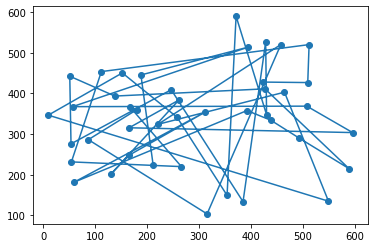

In [8]:
Pr=0.5 #initiate accept possibility
T0=dif/Pr#initiate terperature
T=T0
Tmin=T/50
k=10*len(paths) #times of internal circulation
initialPath=paths.copy()
length=CalLength(citys,initialPath,start,end)
print (length)

t=0 #time  
plt.scatter(citys['x'],citys['y'])
plt.plot(citys['x'],citys['y']) 

In [9]:
citys = np.array(citys, dtype=float)

A = spatial.distance.squareform(spatial.distance.pdist(citys))

In [10]:

import frigidum

from frigidum.examples import tsp

In [13]:
def rand_start():
    random_guess = np.arange(0, len(citys))
    np.random.seed(100)
    np.random.shuffle(random_guess)
    return random_guess
local_opt = frigidum.sa(random_start=rand_start,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=100,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing=None)

T: 0.001, M: 0.00, O_min: 6502.1729, O_current: 6502.1729: 100%|██████████| 139/139 [01:39<00:00,  1.39cooling/s]

---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.019957
   euclidian_nuke_and_fix           : 0.052161
   route_bomb_and_fix               : 0.023264
   route_nuke_and_fix               : 0.018793
   random_disconnect_vertices_and_  : 0.000000
---
(Local) Minimum Objective Value Found: 
   6502.17288664


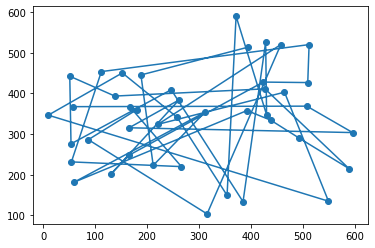

In [14]:
plt.scatter(citys[:, 0][local_opt[0]], citys[:, 1][local_opt[0]])
plt.plot(citys[:, 0][local_opt[0]], citys[:, 1][local_opt[0]])